In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [4]:
def data_summary(x_train,x_test,y_train,y_test):

    print("Train images shape:", x_train.shape)
    print("Train labels shape:", y_train.shape)
    print("Test images shape:", x_test.shape)
    print("Test labels shape:", y_test.shape)
    print("Total classes:", np.unique(y_train))

In [5]:
data_summary(x_train,x_test,y_train,y_test)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Total classes: [0 1 2 3 4 5 6 7 8 9]


In [6]:
labels_map = {0: "Airplane", 
              1: "Automobile", 
              2: "Bird", 
              3: "Cat", 
              4: "Deer", 
              5: "Dog", 
              6: "Frog", 
              7: "Horse", 
              8: "Ship", 
              9: "Truck"}

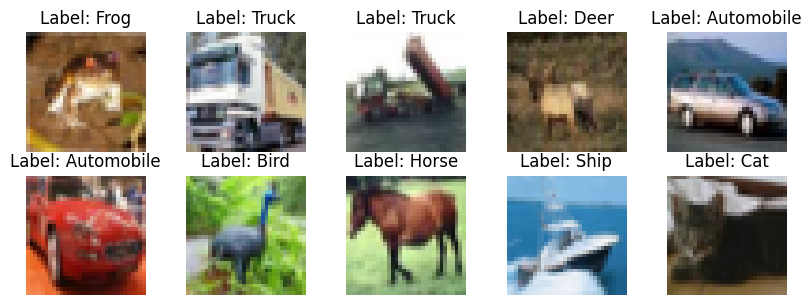

In [7]:
# Plotting first 10 images

plt.figure(figsize = (10,9))
for i in range(0,10):
    ax = plt.subplot(5,5,i+1)
    plt.title(f"Label: {labels_map[y_train[i][0]]}")
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")

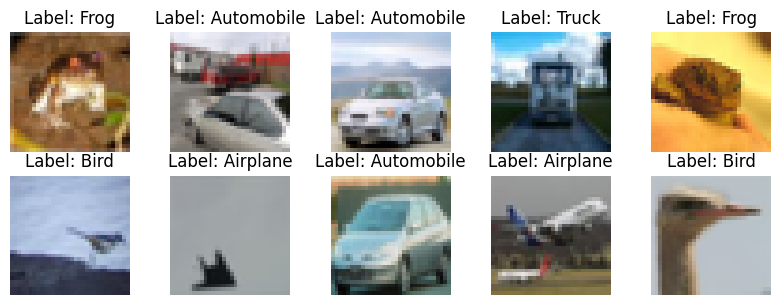

In [8]:
# Last 10 images
plt.figure(figsize=(10, 9))
for i in range(0, 10):
    ax = plt.subplot(5, 5, i+1)
    plt.title(f"Label: {labels_map[y_train[-i][0]]}")
    plt.imshow(x_train[-i], cmap="gray")
    plt.axis("off")

In [9]:
NUM_ROWS = 32
NUM_COLS = 32
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 30

In [10]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [11]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [12]:
data_summary(x_train,x_test,y_train,y_test)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 10)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)
Total classes: [0. 1.]


In [13]:
from keras import models
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [14]:
model = models.Sequential()

model.add(Input(shape=(32,32,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten(input_shape=(32, 32, 3)))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

C:\Users\User\Downloads\anaconda\envs\new\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
import livelossplot

plot_losses = livelossplot.PlotLossesKeras()

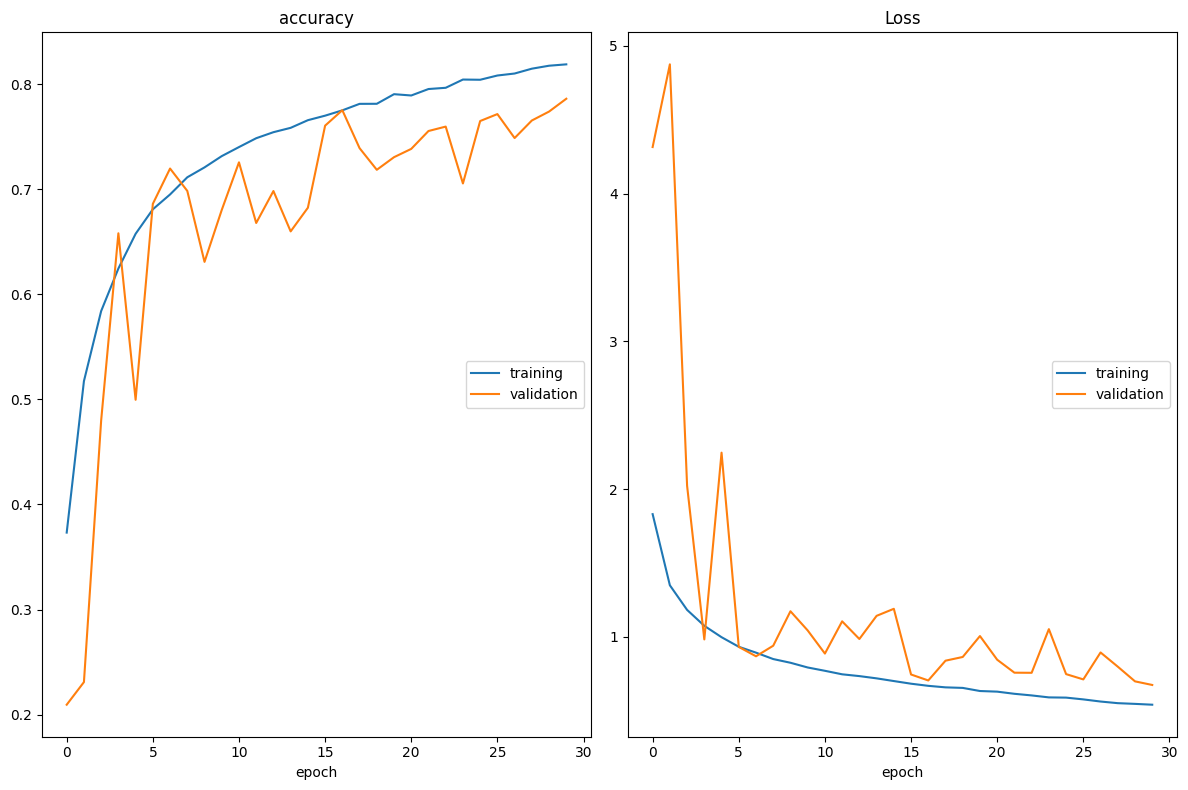

accuracy
	training         	 (min:    0.373, max:    0.819, cur:    0.819)
	validation       	 (min:    0.209, max:    0.786, cur:    0.786)
Loss
	training         	 (min:    0.541, max:    1.830, cur:    0.541)
	validation       	 (min:    0.674, max:    4.874, cur:    0.674)
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.8191 - loss: 0.5343 - val_accuracy: 0.7860 - val_loss: 0.6742
Test loss: 0.6741774678230286
Test accuracy: 0.7860000133514404


In [16]:
#Compile model

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Train model
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[plot_losses], verbose=1, validation_data=(x_test, y_test))

score=model.evaluate(x_test, y_test, verbose=0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,461,398 (9.39 MB)

 Trainable params: 1,230,506 (4.69 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 1,230,508 (4.69 MB)